In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pairtrader import *

In [2]:
close = pd.read_csv('data/crypto_1m.csv', index_col='unix') # reads the closing prices of 129 stocks from the energy sector
close.shape # N closing prices, 17 different symbols

(248925, 17)

In [3]:
# choose a pair; refer to our heatmap to choose a cointegrated pair
# use 48 hours; first 24 for model fit, last 24 for model test
# Order matters slightly! Ideally order by how regression for adf test was ordered.
X = close['trx'][-60*24*2:]
Y = close['ada'][-60*24*2:]

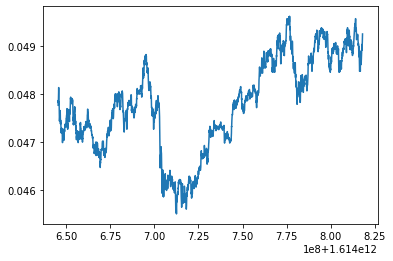

In [4]:
plt.plot(X)

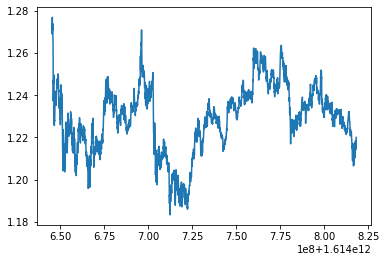

In [5]:
plt.plot(Y)

In [6]:
# params
z_crit = 2
z_sl = 1
z_tp = 1
window = 60 # 60 mins
trade_size = 10000
trainval_split = len(X)//2
# first half of split meets model assumptions by adf test (reject unit root = 1)
# first half of split is training set used to fit Y ~ X
# second half of split is validation set where trading occurs

In [7]:
pt = PairTrader(X, Y, z_crit, z_sl, z_tp, trainval_split, window, trade_size)

In [8]:
pt.fit_model()

In [9]:
account, logs = pt.test_model()

In [10]:
print('Cash Balance:', account.cash_balance)
print('Asset Balance:', account.asset_balance)
print('Total Balance:', account.total_balance)
print('Open Positions:', account.positions)
print('Logs:', logs)
longs = [i[0] for i in logs if i[1] == 'L']
shorts = [i[0] for i in logs if i[1] == 'S']
stop_loss = [i[0] for i in logs if i[1] == 'SL']
take_profit = [i[0] for i in logs if i[1] == 'TP']
print('Losses:', len(stop_loss))
print('Profits:', len(take_profit))

Cash Balance: 8119.634401002081
Asset Balance: 2259.6443765893846
Total Balance: 10379.278777591466
Open Positions: {'Y': [8228.962656967464, 1.21522], 'X': [-157676.83078856423, 0.049089999999999995]}
Logs: [(1464, 'S'), (1467, 'TP'), (1595, 'L'), (1614, 'TP'), (1619, 'L'), (1633, 'TP'), (1641, 'L'), (1659, 'TP'), (1719, 'L'), (1734, 'TP'), (1799, 'S'), (1811, 'SL'), (1812, 'S'), (1816, 'TP'), (1845, 'L'), (1848, 'TP'), (1874, 'S'), (1878, 'TP'), (1906, 'S'), (1907, 'SL'), (1908, 'S'), (1909, 'SL'), (1910, 'S'), (1925, 'TP'), (1966, 'L'), (1969, 'TP'), (2002, 'L'), (2006, 'TP'), (2039, 'L'), (2064, 'TP'), (2068, 'L'), (2081, 'TP'), (2115, 'L'), (2119, 'TP'), (2153, 'L'), (2157, 'TP'), (2162, 'S'), (2163, 'SL'), (2164, 'S'), (2165, 'SL'), (2166, 'S'), (2177, 'TP'), (2226, 'S'), (2234, 'TP'), (2257, 'L'), (2259, 'SL'), (2272, 'L'), (2283, 'TP'), (2296, 'L'), (2303, 'TP'), (2359, 'S'), (2364, 'TP'), (2376, 'L'), (2377, 'TP'), (2380, 'L'), (2383, 'TP'), (2391, 'L'), (2395, 'TP'), (2401, '

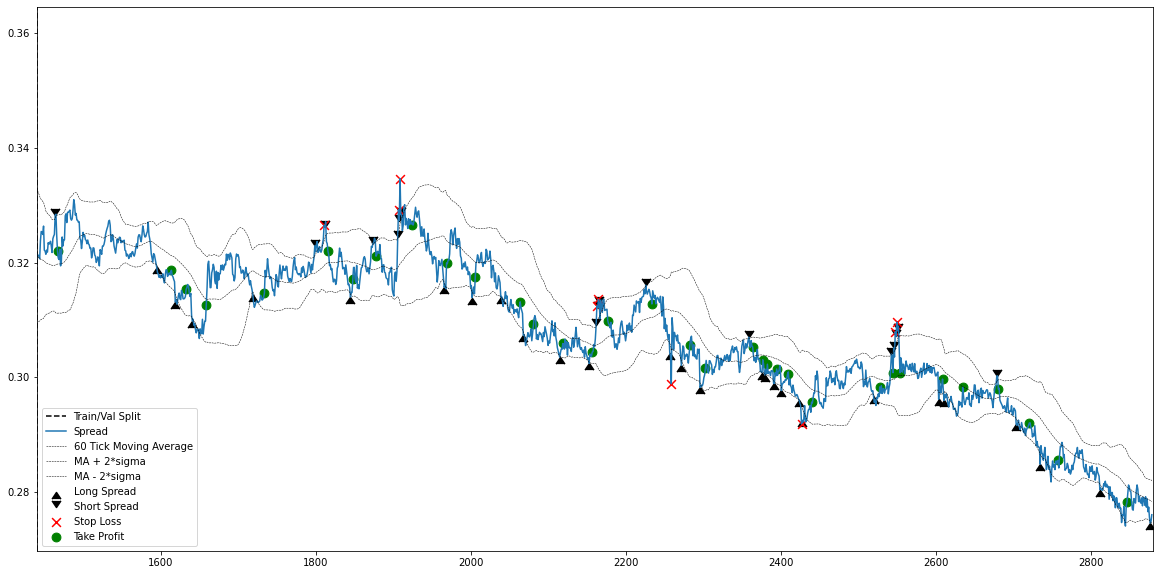

In [11]:
spread_plot = pt.plot('spread', zoom=True)

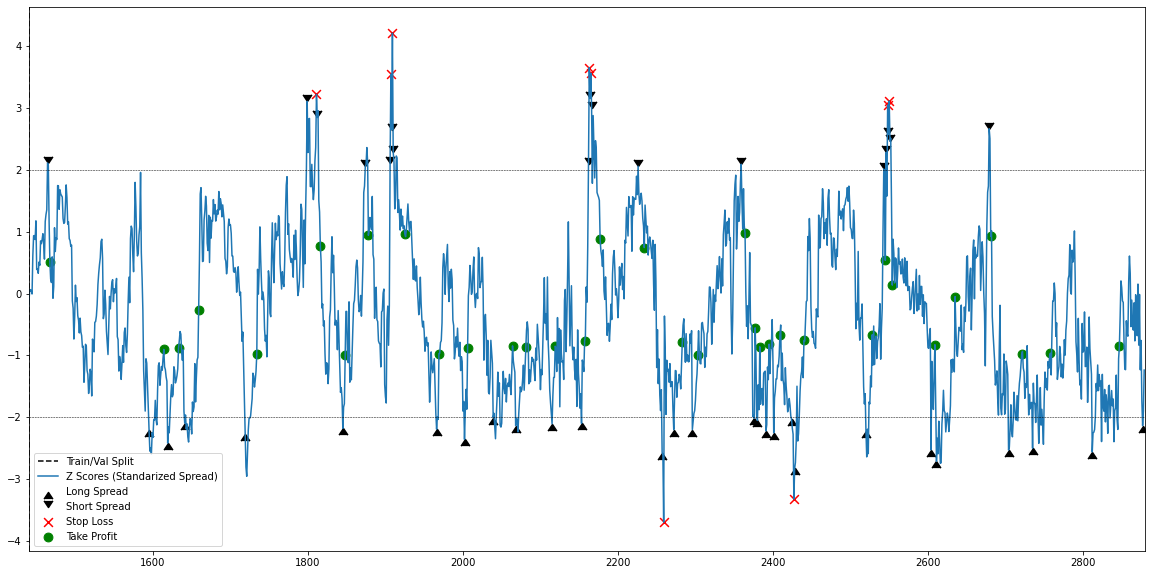

In [12]:
z_plot = pt.plot('z', zoom=True)